In [1]:
import numpy as np
import datetime
import pandas as pd
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import math, warnings
import statistics 
from collections import defaultdict
import requests
import json
import urllib
import xmltodict

%matplotlib inline
sns.set(style="darkgrid")

In [47]:
ispark_info_df = pd.read_excel("/Users/alperoner/Desktop/Robot Intelligence/MEF/data/ispark-otoparklarna-ait-bilgiler.xlsx")
ispark_info_df

,İsim,İSPARK Otoparklarına Ait Bilgiler
0,Açıklama,İSPARK Otoparklarına ait bilgileri içerir. (Pa...
1,Kategori,Mobilite
2,Anahtar kelimeler,"Ulaşım, mobilite, Otopark, İSPARK"
3,Yayınlayıcı,İSPARK A.Ş.
4,Veri tarih aralığı,2019
5,Oluşturucu,İSPARK A.Ş.
6,Oluşturulma tarihi,2020-01-01 00:00:00
7,Coğrafi veri içeriyor mu?,Evet
8,Veri güncelleme sıklığı,Yıllık
9,Tipi,Gerçek veri


In [21]:
# defining a params dict for the parameters to be sent to the API 
PARAMS = {'GetDurak_XML': ''}
# sending get request and saving the response as response object 
r = requests.get('https://api.ibb.gov.tr/iett/UlasimAnaVeri/HatDurakGuzergah.asmx?wsdl', params = PARAMS, allow_redirects=True)
#url = "https://data.ibb.gov.tr/datastore/odata3.0/d5fe41b0-3848-4548-9ac7-6e4756c3027b?$format=json"
#r = requests.get(url)
url = "https://api.ibb.gov.tr/iett/UlasimAnaVeri/HatDurakGuzergah.asmx?wsdl"

print(r.status_code)
#print(r.json())
r.headers

200


{'Content-Type': 'text/xml;charset=utf-8', 'Date': 'Sun, 09 Feb 2020 16:52:29 GMT', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains;preload', 'Cache-Control': 'private', 'Content-Encoding': 'gzip', 'Transfer-Encoding': 'chunked'}

In [44]:
# API connection
# sending get request and saving the response as response object 
url = "https://data.ibb.gov.tr/datastore/odata3.0/c3eb0d72-1ce4-4983-a3a8-6b0b4b19fcb9?$format=json"
r = urllib.request.urlopen(url)
# Veriyi python-json dosya biçimine dönüştürme
data = json.loads(r.read().decode())
# Sadece datanın olduğu bölümün alınması
data = data.get("value")
# Verinin dataframe formatına dönüştürülmesi
df = pd.DataFrame(data)
df

,_id,Park ID,Park Adi,Lokasyon ID,Lokasyon Kodu,Lokasyon Adi,Park Tipi ID,Park Tipi,Park Kapasitesi,Calisma Saatleri,...,Ilce,Adres,Enlem/Boylam,Polygon Verisi,Boylam,Enlem,Aylik Abonelik Ucreti,Ucretsiz Parklanma Suresi (dakika),Tarifesi,Park Et Devam Et Noktasi
0,1,359,Atatürk Bulvarı 1,150,1,0001 Atatürk Bulvarı 1,2,YOL ÜSTÜ,18,07:30-18:30,...,FATİH,KEMALPAŞA MAHALLESİ ATATÜRK BULVARI 1 / EMİNÖNÜ,POINT (28.953538299155497 41.011291499669255),"MULTIPOLYGON (((28.95351077 41.01117896, 28.95...",28.953538,41.011291,0.0,15,"0-1 Saat : 10,00;1-2 Saat : 11,00;2-4 Saat ...",0
1,2,860,Bakırköy İstanbul Caddesi 1,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,30,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.8747420429072 40.97837155571149),"MULTIPOLYGON (((28.87445897 40.97835591, 28.87...",28.874742,40.978372,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
2,3,861,Bakırköy İstanbul Caddesi 2,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,30,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.875321425593391 40.97841938898064),"MULTIPOLYGON (((28.87546464 40.97842251, 28.87...",28.875321,40.978419,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
3,4,862,Bakırköy İstanbul Caddesi 3,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,70,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.87595720460348 40.978472523602171),"MULTIPOLYGON (((28.87628195 40.9784853, 28.876...",28.875957,40.978473,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
4,5,867,Bakırköy İstanbul Caddesi 8,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,40,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.878947832742334 40.978643838182634),"MULTIPOLYGON (((28.87909771 40.97868195, 28.87...",28.878948,40.978644,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
5,305,519,Çağlayan 2,237,270,0270 Çağlayan Vatan Caddesi,2,YOL ÜSTÜ,60,08:00-18:00,...,KAĞITHANE,ÇAĞLAYAN MAHALLESİ VATAN CADDESİ/ KAĞITHANE,POINT (28.981815892522828 41.076983577950074),"MULTIPOLYGON (((28.98183814 41.077197, 28.9818...",28.981816,41.076984,120.0,15,"0-2 Saat : 8,00;2-4 Saat : 9,00;4-6 Saat : ...",0
6,6,868,Bakırköy İstanbul Caddesi 9,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,45,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.879683562183335 40.978706070466231),"MULTIPOLYGON (((28.87979945 40.97870833, 28.87...",28.879684,40.978706,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
7,7,1146,Balmumcu Açık,550,3,0003 Balmumcu Açık,3,AÇIK OTOPARK,140,24 Saat,...,BEŞİKTAŞ,BARBAROS BULVARI BAHAR SOKAK NO:1 BEŞİKTAŞ İST...,POINT (29.010651721434179 41.062041595333113),"MULTIPOLYGON (((29.01053667 41.06228857, 29.01...",29.010652,41.062042,290.0,5,"0-1 Saat : 8,00;1-2 Saat : 10,00;2-4 Saat :...",0
8,8,812,Bebek Açık,364,4,0004 Bebek Açık,3,AÇIK OTOPARK,35,24 Saat,...,BEŞİKTAŞ,BEBEK MAH. CEVDETPAŞA CAD. BEŞİKTAŞ / İSTANBUL,POINT (29.043497403541323 41.076865753318828),"MULTIPOLYGON (((29.04348441 41.07681321, 29.04...",29.043497,41.076866,360.0,0,"0-1 Saat : 13,00;1-2 Saat : 15,00;2-4 Saat ...",0
9,9,2468,Bebek Açık,364,4,0004 Bebek Açık,3,AÇIK OTOPARK,35,24 Saat,...,BEŞİKTAŞ,BEBEK MAH. CEVDETPAŞA CAD. BEŞİKTAŞ / İSTANBUL,POINT (29.043445655770483 41.076966162734607),LINESTRING (29.043620669910524 41.077045017773...,29.043446,41.076966,360.0,0,"0-1 Saat : 13,00;1-2 Saat : 15,00;2-4 Saat ...",0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
_id                                   500 non-null int64
Park ID                               500 non-null int64
Park Adi                              500 non-null object
Lokasyon ID                           500 non-null int64
Lokasyon Kodu                         500 non-null int64
Lokasyon Adi                          500 non-null object
Park Tipi ID                          500 non-null int64
Park Tipi                             500 non-null object
Park Kapasitesi                       500 non-null int64
Calisma Saatleri                      500 non-null object
Bolge ID                              500 non-null int64
Bolge                                 500 non-null object
Alt Bolge ID                          500 non-null int64
Alt Bolge                             500 non-null object
Ilce ID                               500 non-null int64
Ilce                              

In [48]:
df.describe()

,_id,Park ID,Lokasyon ID,Lokasyon Kodu,Park Tipi ID,Park Kapasitesi,Bolge ID,Alt Bolge ID,Ilce ID,Boylam,Enlem,Aylik Abonelik Ucreti,Ucretsiz Parklanma Suresi (dakika),Park Et Devam Et Noktasi
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,435.000000,435.000000,500.000000,500.000000,500.000000
mean,251.318000,1072.610000,538.288000,356.770000,2.220000,128.344000,3.722000,549.632000,19.612000,28.979115,41.019033,167.240000,11.220000,0.056000
std,146.156547,779.827355,517.613366,344.305151,0.619975,329.446967,0.448462,441.156501,10.265682,0.154069,0.056428,135.177766,6.775205,0.230152
min,1.000000,1.000000,51.000000,1.000000,1.000000,0.000000,3.000000,5.000000,3.000000,28.243480,40.815009,0.000000,0.000000,0.000000
25%,125.750000,392.500000,166.000000,96.750000,2.000000,29.750000,3.000000,6.000000,10.000000,28.948539,40.992363,0.000000,5.000000,0.000000
50%,250.500000,949.500000,379.000000,258.000000,2.000000,40.000000,4.000000,545.000000,20.000000,28.994203,41.020539,200.000000,15.000000,0.000000
75%,375.250000,1478.750000,663.750000,516.000000,3.000000,90.500000,4.000000,1082.000000,28.000000,29.040225,41.055365,250.000000,15.000000,0.000000
max,624.000000,2886.000000,2090.000000,1474.000000,5.000000,5000.000000,4.000000,1083.000000,39.000000,29.308727,41.152977,800.000000,60.000000,1.000000


In [60]:
df.columns

Index(['_id', 'Park ID', 'Park Adi', 'Lokasyon ID', 'Lokasyon Kodu',
       'Lokasyon Adi', 'Park Tipi ID', 'Park Tipi', 'Park Kapasitesi',
       'Calisma Saatleri', 'Bolge ID', 'Bolge', 'Alt Bolge ID', 'Alt Bolge',
       'Ilce ID', 'Ilce', 'Adres', 'Enlem/Boylam', 'Polygon Verisi', 'Boylam',
       'Enlem', 'Aylik Abonelik Ucreti', 'Ucretsiz Parklanma Suresi (dakika)',
       'Tarifesi', 'Park Et Devam Et Noktasi'],
      dtype='object')

In [65]:
df['Lokasyon Adi'].value_counts()

0079 Ataşehir Bulvarı                          18
0216 Fevzipaşa Caddesi                         10
0258 Yeşilköy İstasyon Caddesi                  8
0372 Sabancı Öğretmen Evi Önü                   7
0262 Yıldızposta Caddesi                        7
                                               ..
1204 Çırpıcı Sosyal Tesisler                    1
0186 Küçük Çamlıca                              1
0671 Beşiktaş Barboros Bulvarı Taksi Durağı     1
0248 Kartal Balıkçılar                          1
0083 Ahmet Fetgeri-Camii Sokak                  1
Name: Lokasyon Adi, Length: 291, dtype: int64

In [150]:
df['Park ID'].value_counts()

YOGURT               10547
AYRAN VE KEFIRLER     4872
Name: MALZEME_ALT_GRUP, dtype: int64

In [66]:
df['Bolge'].value_counts()

Avrupa     361
Anadolu    139
Name: Bolge, dtype: int64

In [67]:
df['Ilce'].value_counts()

FATİH            85
BEŞİKTAŞ         67
ŞİŞLİ            49
BAKIRKÖY         37
KADIKÖY          36
BEYOĞLU          31
ATAŞEHİR         27
SARIYER          23
GÜNGÖREN         19
KARTAL           18
PENDİK           16
ÜSKÜDAR          15
BEYKOZ           13
SİLİVRİ          11
ÜMRANİYE          9
BAHÇELİEVLER      7
EYÜP              7
AVCILAR           5
MALTEPE           4
KAĞITHANE         4
ZEYTİNBURNU       4
GAZİOSMANPAŞA     3
BAYRAMPAŞA        3
ESENLER           2
BAĞCILAR          2
TUZLA             1
BEYLİKDÜZÜ        1
KÜÇÜKÇEKMECE      1
Name: Ilce, dtype: int64

In [68]:
df

,_id,Park ID,Park Adi,Lokasyon ID,Lokasyon Kodu,Lokasyon Adi,Park Tipi ID,Park Tipi,Park Kapasitesi,Calisma Saatleri,...,Ilce,Adres,Enlem/Boylam,Polygon Verisi,Boylam,Enlem,Aylik Abonelik Ucreti,Ucretsiz Parklanma Suresi (dakika),Tarifesi,Park Et Devam Et Noktasi
0,1,359,Atatürk Bulvarı 1,150,1,0001 Atatürk Bulvarı 1,2,YOL ÜSTÜ,18,07:30-18:30,...,FATİH,KEMALPAŞA MAHALLESİ ATATÜRK BULVARI 1 / EMİNÖNÜ,POINT (28.953538299155497 41.011291499669255),"MULTIPOLYGON (((28.95351077 41.01117896, 28.95...",28.953538,41.011291,0.0,15,"0-1 Saat : 10,00;1-2 Saat : 11,00;2-4 Saat ...",0
1,2,860,Bakırköy İstanbul Caddesi 1,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,30,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.8747420429072 40.97837155571149),"MULTIPOLYGON (((28.87445897 40.97835591, 28.87...",28.874742,40.978372,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
2,3,861,Bakırköy İstanbul Caddesi 2,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,30,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.875321425593391 40.97841938898064),"MULTIPOLYGON (((28.87546464 40.97842251, 28.87...",28.875321,40.978419,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
3,4,862,Bakırköy İstanbul Caddesi 3,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,70,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.87595720460348 40.978472523602171),"MULTIPOLYGON (((28.87628195 40.9784853, 28.876...",28.875957,40.978473,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
4,5,867,Bakırköy İstanbul Caddesi 8,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,40,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.878947832742334 40.978643838182634),"MULTIPOLYGON (((28.87909771 40.97868195, 28.87...",28.878948,40.978644,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
5,305,519,Çağlayan 2,237,270,0270 Çağlayan Vatan Caddesi,2,YOL ÜSTÜ,60,08:00-18:00,...,KAĞITHANE,ÇAĞLAYAN MAHALLESİ VATAN CADDESİ/ KAĞITHANE,POINT (28.981815892522828 41.076983577950074),"MULTIPOLYGON (((28.98183814 41.077197, 28.9818...",28.981816,41.076984,120.0,15,"0-2 Saat : 8,00;2-4 Saat : 9,00;4-6 Saat : ...",0
6,6,868,Bakırköy İstanbul Caddesi 9,384,2,0002 Bakırköy İstanbul Caddesi,2,YOL ÜSTÜ,45,08:00-19:00,...,BAKIRKÖY,YEŞİLKÖY MAHALLESİ İSTANBUL CADDESİ ÜZERİ BAKI...,POINT (28.879683562183335 40.978706070466231),"MULTIPOLYGON (((28.87979945 40.97870833, 28.87...",28.879684,40.978706,400.0,15,"0-1 Saat : 10,00;1-2 Saat : 12,00;2-4 Saat ...",0
7,7,1146,Balmumcu Açık,550,3,0003 Balmumcu Açık,3,AÇIK OTOPARK,140,24 Saat,...,BEŞİKTAŞ,BARBAROS BULVARI BAHAR SOKAK NO:1 BEŞİKTAŞ İST...,POINT (29.010651721434179 41.062041595333113),"MULTIPOLYGON (((29.01053667 41.06228857, 29.01...",29.010652,41.062042,290.0,5,"0-1 Saat : 8,00;1-2 Saat : 10,00;2-4 Saat :...",0
8,8,812,Bebek Açık,364,4,0004 Bebek Açık,3,AÇIK OTOPARK,35,24 Saat,...,BEŞİKTAŞ,BEBEK MAH. CEVDETPAŞA CAD. BEŞİKTAŞ / İSTANBUL,POINT (29.043497403541323 41.076865753318828),"MULTIPOLYGON (((29.04348441 41.07681321, 29.04...",29.043497,41.076866,360.0,0,"0-1 Saat : 13,00;1-2 Saat : 15,00;2-4 Saat ...",0
9,9,2468,Bebek Açık,364,4,0004 Bebek Açık,3,AÇIK OTOPARK,35,24 Saat,...,BEŞİKTAŞ,BEBEK MAH. CEVDETPAŞA CAD. BEŞİKTAŞ / İSTANBUL,POINT (29.043445655770483 41.076966162734607),LINESTRING (29.043620669910524 41.077045017773...,29.043446,41.076966,360.0,0,"0-1 Saat : 13,00;1-2 Saat : 15,00;2-4 Saat ...",0


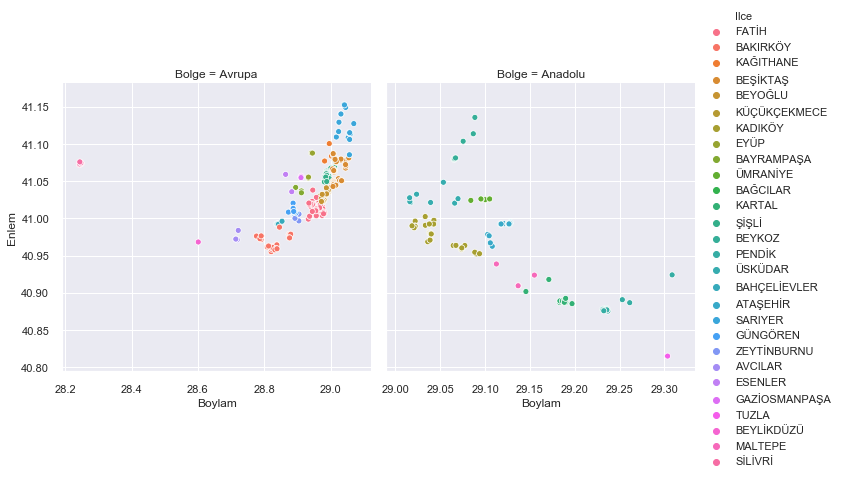

In [74]:
sns_plot = sns.relplot(x = 'Boylam', y = 'Enlem', hue = 'Ilce', col ='Bolge', data = df, facet_kws=dict( sharex=False,sharey=True, despine=True))

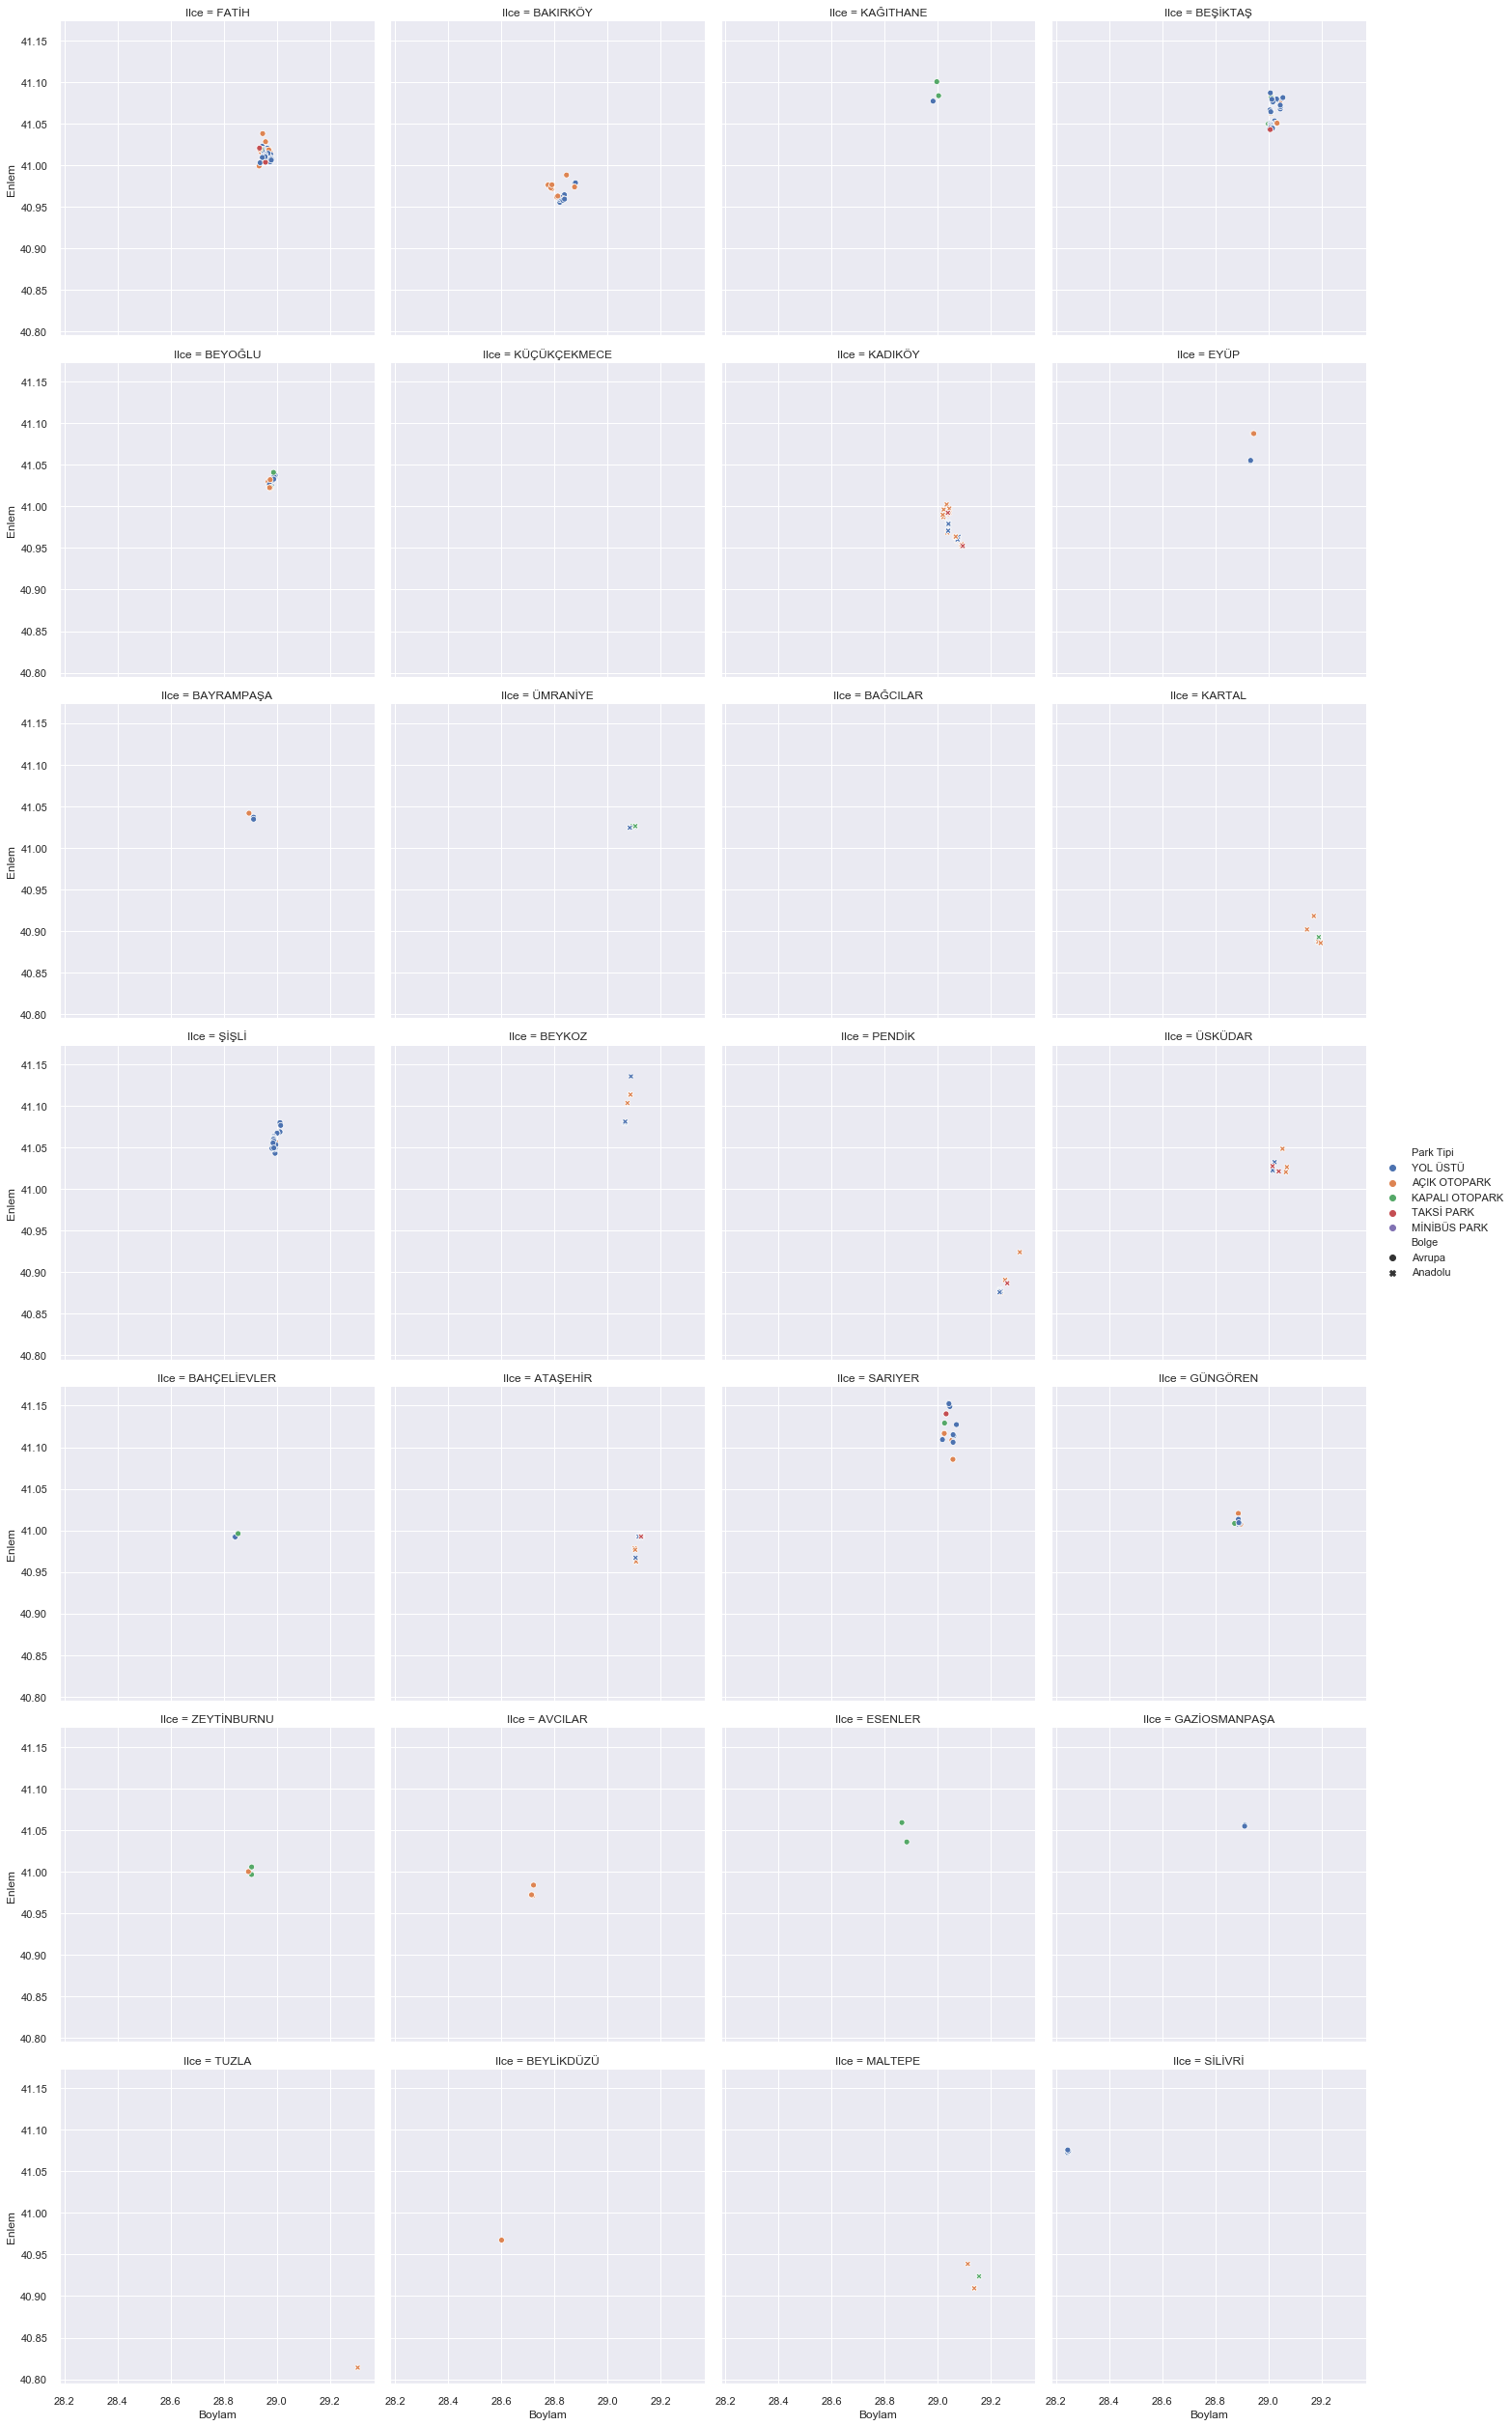

In [75]:
sns_plot = sns.relplot(x = 'Boylam', y = 'Enlem', hue = 'Park Tipi', style = 'Bolge', col ='Ilce', col_wrap= 4, data = df, facet_kws=dict( sharex=True,sharey=True, despine=True))
#sns_plot.savefig("/Users/alperoner/Desktop/workspace/arctic/data/Figures/michigan_temp_rain_year.png", dpi=600)

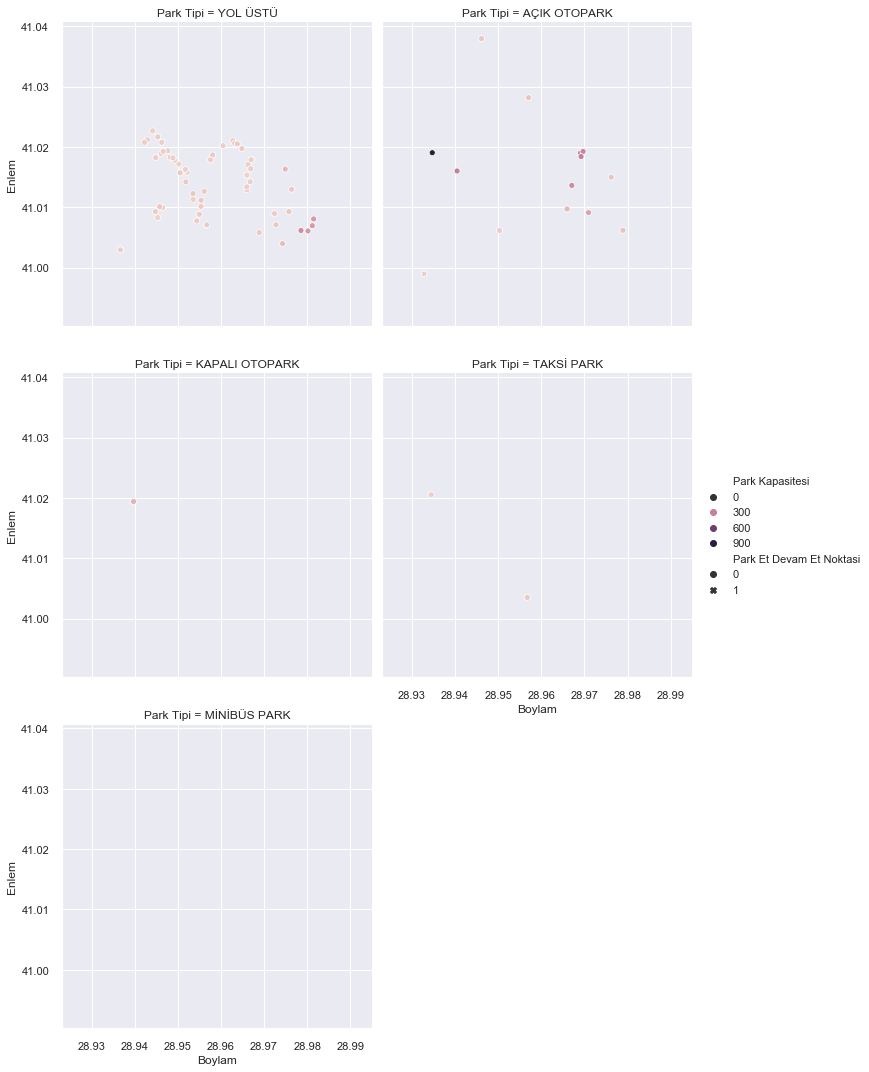

In [92]:
sns_plot = sns.relplot(x = 'Boylam', y = 'Enlem', hue = 'Park Kapasitesi', style = 'Park Et Devam Et Noktasi', col ='Park Tipi', col_wrap= 2, data = df.query("Ilce == 'FATİH'"), facet_kws=dict( sharex=True,sharey=True, despine=True))

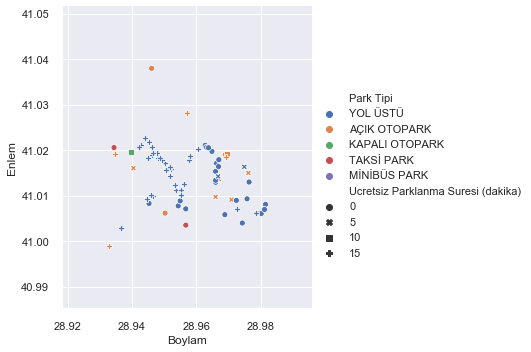

In [85]:
sns_plot = sns.relplot(x = 'Boylam', y = 'Enlem', hue = 'Park Tipi', style = 'Ucretsiz Parklanma Suresi (dakika)', data = df.query("Ilce == 'FATİH'"), facet_kws=dict( sharex=True,sharey=True, despine=True))